In [2]:
import os 
cwd = os.getcwd()
import sys
sys.path.append("C:/Users/gomel/Documents/global_python_codes/Metrics_thresholds_boots") # go to parent dir

sys.path.append("C:/Users/gomel/Documents/Programing Proyects/EE indicators/Simulations with pdfs to test/Stochastic equations/SDE tests jupyter") # go to parent dir
import sde_analysis as sa

import sympy as sp
import ewstools as ews
import numpy as np
import sdeint
import metrics
import boots as bts
import scipy.stats as st
import astropy.stats as astrost
import scipy.signal as sg
from scipy import special

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif"    
})
import matplotlib.lines as lines
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

from sympy import lambdify

c1=(221/256,170/256,51/256)
c2=(187/256,85/256,102/256)
c3=(0,68/256,136/256)
cols=(c1,c2,c3)

This is a simulation of a onlinear equation with aditive noise using a Heun method where the noise only applies on the variable and not the parameter. 

The stochastic equation is 

\begin{equation}
dx=\lambda x-x^3+a +\sigma dW
\end{equation}



In [93]:
xs, cs,  ls = sp.symbols('x c  lambda')
eq=-xs**3+cs*xs+ls
M=-3*xs**2+cs
print('..', -(-0.9/3)**3-(-ls/2)**2)
sp.solve(eq, xs)

.. 0.027 - lambda**2/4


[-c/(-27*lambda/2 + sqrt(-108*c**3 + 729*lambda**2)/2)**(1/3) - (-27*lambda/2 + sqrt(-108*c**3 + 729*lambda**2)/2)**(1/3)/3,
 -c/((-1/2 - sqrt(3)*I/2)*(-27*lambda/2 + sqrt(-108*c**3 + 729*lambda**2)/2)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(-27*lambda/2 + sqrt(-108*c**3 + 729*lambda**2)/2)**(1/3)/3,
 -c/((-1/2 + sqrt(3)*I/2)*(-27*lambda/2 + sqrt(-108*c**3 + 729*lambda**2)/2)**(1/3)) - (-1/2 + sqrt(3)*I/2)*(-27*lambda/2 + sqrt(-108*c**3 + 729*lambda**2)/2)**(1/3)/3]

In [94]:
c=0.9
a=-1
print('..', -(-c/3)**3-(-a/2)**2)

s1=-c/(-27*a/2 + np.sqrt(729*a**2 - 108*c**3)/2)**(1/3) - (-27*a/2 + np.sqrt(729*a**2 - 108*c**3)/2)**(1/3)/3
s2=-c/((-1/2 - np.sqrt(3)*1j/2)*(-27*a/2 + np.sqrt(729*a**2 - 108*c**3)/2)**(1/3)) - (-1/2 - np.sqrt(3)*1j/2)*(-27*a/2 + np.sqrt(729*a**2 - 108*c**3)/2)**(1/3)/3
s3=-c/((-1/2 + np.sqrt(3)*1j/2)*(-27*a/2 + np.sqrt(729*a**2 - 108*c**3)/2)**(1/3)) - (-1/2 + np.sqrt(3)*1j/2)*(-27*a/2 + np.sqrt(729*a**2 - 108*c**3)/2)**(1/3)/3



def m_sol1(c,a):
    sr=(-27*a/2 + np.emath.sqrt(729*a**2 - 108*c**3)/2)**(1/3)/3
    sl1=-c/((-1/2 + np.emath.sqrt(3)*1j/2)*sr)
    sl2=(-1/2 + np.emath.sqrt(3)*1j/2)*sr
    
    return sl1-sl2

def m_sol2(c,a):
     
    sl2=-c/(-27*a/2 + np.emath.sqrt(729*a**2 - 108*c**3)/2)**(1/3)
    sr=(-27*a/2 + np.emath.sqrt(729*a**2 - 108*c**3)/2)**(1/3)/3
    return sl2-sr

def m_sol3(c,a):
    sr=(-27*a/2 + np.emath.sqrt(729*a**2 - 108*c**3)/2)**(1/3)/3
    sl1=-c/((-1/2 - np.emath.sqrt(3)*1j/2)*sr)
    sl2=(-1/2 - np.emath.sqrt(3)*1j/2)*sr
    
    return sl1-sl2

m_sol1(c,a)

.. -0.223


(0.949572455207084-0.07115857688310301j)

<lambdifygenerated-40>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.9 - 2.43*(-(-27/2*lambda_ + (27/2)*sqrt(lambda_**2 - 0.108))**(-0.333333333333333)/(-0.5 + 0.5*sqrt(3)*1j) - 0.37037037037037*(-0.5 + 0.5*sqrt(3)*1j)*(-27/2*lambda_ + (27/2)*sqrt(lambda_**2 - 0.108))**0.333333333333333)**2
<lambdifygenerated-40>:2: RuntimeWarning: invalid value encountered in power
  return 0.9 - 2.43*(-(-27/2*lambda_ + (27/2)*sqrt(lambda_**2 - 0.108))**(-0.333333333333333)/(-0.5 + 0.5*sqrt(3)*1j) - 0.37037037037037*(-0.5 + 0.5*sqrt(3)*1j)*(-27/2*lambda_ + (27/2)*sqrt(lambda_**2 - 0.108))**0.333333333333333)**2
C:\Users\gomel\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


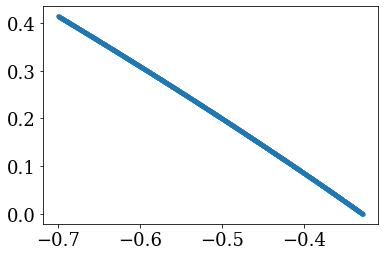

In [144]:
sp.solve(M, xs)

sol1=-cs/(-27*ls/2 + sp.sqrt(729*ls**2 - 108*cs**3)/2)**(1/3) - (-27*ls/2 + sp.sqrt(729*ls**2 - 108*cs**3)/2)**(1/3)/3
sol2=-cs/((-1/2 + sp.sqrt(3)*1j/2)*(-27*ls/2 + sp.sqrt(729*ls**2 - 108*cs**3)/2)**(1/3)) - (-1/2 + sp.sqrt(3)*1j/2)*(-27*ls/2 + sp.sqrt(729*ls**2 - 108*cs**3)/2)**(1/3)/3
sol3=-cs/((-1/2 - sp.sqrt(3)*1j/2)*(-27*ls/2 + sp.sqrt(729*ls**2 - 108*cs**3)/2)**(1/3)) - (-1/2 - sp.sqrt(3)*1j/2)*(-27*ls/2 + sp.sqrt(729*ls**2 - 108*cs**3)/2)**(1/3)/3


sp_dxdl=sp.diff(sol2,cs)


Mr=M.subs(xs, sol2)
Mr=Mr.subs(cs,0.9)
Mr


cl=0.02
ad0 = lambdify([ls],-2*Mr*ls/cl)
ad2 = lambdify([ls],-Mr*ls/cl)

Mr.subs(ls,0.3)

s2=lambdify([ls],Mr)
plt.plot(lvars,s2(lvars),'.')


<lambdifygenerated-38>:2: RuntimeWarning: invalid value encountered in sqrt
  return 50.0*lambda_*(4.86*(-(-27/2*lambda_ + (27/2)*sqrt(lambda_**2 - 0.108))**(-0.333333333333333)/(-0.5 + 0.5*sqrt(3)*1j) - 0.37037037037037*(-0.5 + 0.5*sqrt(3)*1j)*(-27/2*lambda_ + (27/2)*sqrt(lambda_**2 - 0.108))**0.333333333333333)**2 - 1.8)
<lambdifygenerated-38>:2: RuntimeWarning: invalid value encountered in power
  return 50.0*lambda_*(4.86*(-(-27/2*lambda_ + (27/2)*sqrt(lambda_**2 - 0.108))**(-0.333333333333333)/(-0.5 + 0.5*sqrt(3)*1j) - 0.37037037037037*(-0.5 + 0.5*sqrt(3)*1j)*(-27/2*lambda_ + (27/2)*sqrt(lambda_**2 - 0.108))**0.333333333333333)**2 - 1.8)
C:\Users\gomel\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
<lambdifygenerated-39>:2: RuntimeWarning: invalid value encountered in sqrt
  return 50.0*lambda_*(2.43*(-(-27/2*lambda_ + (27/2)*sqrt(lambda_**2 - 0.108))**(-0.33333

(0.0, 40.0)

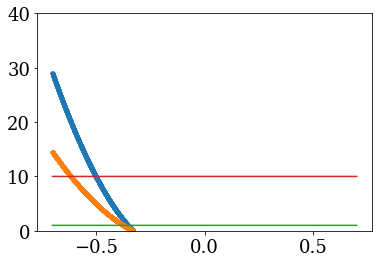

In [145]:
lvars=np.linspace(0.7,-0.7,10000)
plt.plot(lvars,ad0(lvars),'.-')
plt.plot(lvars,ad2(lvars),'.-')
plt.plot(lvars,1+0*lvars,'-')
plt.plot(lvars,10+0*lvars,'-')
plt.ylim([0,40])

In [141]:
adiab=sp.solve(ls/cl+10/(Mr), ls)
adiab=sp.N(adiab[0]) 


lvars=np.linspace(-10,0,1000)


ad1 = lambdify([ls],ls/cl+1/(2*Mr))



KeyboardInterrupt



In [107]:
adiab=sp.N(adiab[0]) 
adiab

TypeError: 'Mul' object is not subscriptable

In [79]:
def pot_rtip(xv,lv):
    return 0.25*xv**4-xv**3*(2.1666*lv**2+1.666*lv)-xv**2*(-6.5*lv**4-8.75*lv**3)-xv*(7.5*lv**6+12.5*lv**5)

C:\Users\gomel\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\gomel\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\gomel\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


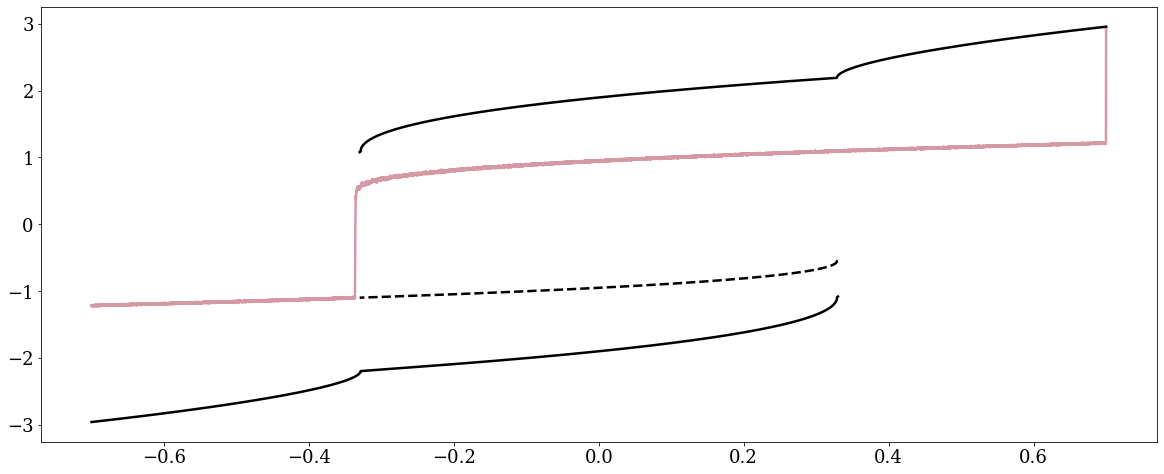

In [80]:
liw=2.5
c=0.9

cls1=[0.0002]


s=0.01
#fig = plt.figure(figsize=(10, 15)axes_class=AxesZero)
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

ax2=ax

li=0.7
l0=li
lf=-0.7
cls=cls1[0]
cl=np.sign(lf-l0)*cls

t_final=(lf-l0)/cl
t_rm=np.abs(1/l0)
t_threshold=t_rm/2
dt=t_threshold/4

datalen=t_final/400000
if datalen>=t_threshold/2: 
    datalen=t_threshold/2

t_win=t_rm/datalen ### length of correlation. 
tspan=np.arange(0,t_final,datalen)

#x0=init_pitch_slanted(l0,j)
x0= np.array([np.real(m_sol1(c,complex(li)))]) 


def f(x, t):
    #X=x[0]. dot(x)=r(x-2)*(x-1)*(x-3)
    #r=x[1]. dot(r)=cte.  This is a constant swipe of parameter r at speed dot(r). 
#    A=np.array([x[1]*x[0]+x[0]**3-x[0]**5,-2*r0/t_final*special.erf(x[1]) ])
    l=l0+cl*t
    A=np.array([-x[0]**3+c*x[0]+l])
    return A

def G(x, t):
    #B=[ 'noise in x'         0    ]
    #  [      0        'noise in r']
    B = np.diag([s]) # diagonal, so independent driving Wiener processes
    #the only parameter with relevant aditive noise is X(t) in this case. 
    return B
np.random.seed(1) #set numpy.random seed for reproducibility whenever it might be used.
l_var=np.linspace(lf,l0,len(tspan))
l=l0+cl*tspan

dl=cl*tspan[1]-l0
result = sdeint.stratHeun(f, G, x0, tspan)
res1=result[:,0]

l_right=0.33
l_left=-l_right

lc=l.astype(complex)
ax2.plot(l,res1,color=c2,linewidth=liw,alpha=0.6)
ax2.plot(l[(l<l_right) & (l>l_left)],m_sol2(c,lc[(l<l_right) & (l>l_left)]),'--',color='black',linewidth=liw,alpha=1)
ax2.plot(l[l>l_left],m_sol1(c,lc[l>l_left]),color='black',linewidth=liw,alpha=1)
ax2.plot(l[l<l_right],-m_sol1(c,-lc[l<l_right]),color='black',linewidth=liw,alpha=1)

#ax2.set_xlim([-0.6,0])


In [ ]:
bif_idx=np.abs(0-l).argmin()
slow_idx=np.abs(adiab3-l).argmin()

fast_window=bif_idx-slow_idx
fast_window
adiab3

M_fun= lambdify([ls],Mr)
lvars=np.linspace(-10,0,1000)
plt.plot(lvars,M_fun(lvars),'.')

t_adiab0=-1/np.real(M1(complex(adiab2)))
t_adiab0/dt

t_adiab=-1/np.real(M_fun(complex(adiab3)))
t_adiab/dt

In [3]:

sol1=sp.sqrt(sp.sqrt(4*ls + 1)/2 + 1/2)
sp_dxdl=sp.diff(sol1,ls)


Mr=M.subs(xs, sol1)
Mr

cl= sp.symbols('c')
rl= sp.symbols('r')

adiab=sp.solve(ls/0.02+1/(2*Mr), ls)
adiab=sp.N(adiab[0]) 
ad1 = lambdify([ls],ls/0.1+1/(2*Mr))


ad0 = lambdify([ls],ls/0.1-1/(2*ls))
radiab=sp.solve(0.1/(Mr)-1, ls)
Mr

lambda + 3*sqrt(4*lambda + 1)/2 + 3/2

### Characteristic time-scale exploration

First we do a deterministic integration to estimate the time-scale of the transition.

In [5]:
l0=-2
lf=2
cls=0.001
cl=np.sign(lf-l0)*cls
s=0.01


adiab=sp.solve(ls/cl+1/(2*Mr), ls)
adiab=sp.N(adiab[0]) 
ad1 = lambdify([ls],ls/cl+1/(2*Mr))

adiab2=sp.solve(ls/cl+1/(Mr), ls)
adiab2=sp.N(adiab2[0]) 
ad2 = lambdify([ls],ls/cl+1/(Mr))
adiab3=sp.solve(ls/cls+10/(Mr), ls)
adiab3=sp.N(adiab3[0]) 
M1 = lambdify([ls],Mr)
adiab_cl=sp.solve(ls/cls+3/(Mr), ls)
adiab_cl=sp.N(adiab_cl[0]) 


t_final=(lf-l0)/cl
t_rm=np.abs(1/M1(lf))
t_threshold=t_rm/2
dt=t_threshold/4
t_win=t_rm/dt ### length of correlation. 
    
datalen=t_final/(600*7*10)
if datalen>=t_threshold/4: 
    datalen=t_threshold/4
    
tspan=np.arange(0,t_final,datalen)
print(r'$\Delta t= $', tspan[1]-tspan[0], 't_final:', t_final)
print('correlation time: ', t_win)
print('data length: ', len(tspan))
print('dot lambda: ', cl)
if l0<0:
    x0 = np.array([0.])
else:
    x0 = np.array([np.sqrt(l0)])
 #       x0= np.array([0.]) 

def f(x, t):
    #X=x[0]. dot(x)=r(x-2)*(x-1)*(x-3)
    #r=x[1]. dot(r)=cte.  This is a constant swipe of parameter r at speed dot(r). 
#    A=np.array([x[1]*x[0]+x[0]**3-x[0]**5,-2*r0/t_final*special.erf(x[1]) ])
    l=l0+cl*t
    A=np.array([(l*(x[0])-(x[0])**3)])
    return A

def G(x, t):
    #B=[ 'noise in x'         0    ]
    #  [      0        'noise in r']
    B = np.diag([s]) # diagonal, so independent driving Wiener processes
    #the only parameter with relevant aditive noise is X(t) in this case. 
    return B
np.random.seed(1) #set numpy.random seed for reproducibility whenever it might be used.
l_var=np.linspace(lf,l0,20)
l=l0+cl*tspan
dl=cl*tspan[1]-l0


result = sdeint.stratHeun(f, G, x0, tspan)
print('Integration DOOONNEE')


$\Delta t= $ 0.015625 t_final: 4000.0
correlation time:  8.0
data length:  256000
dot lambda:  0.001
Integration DOOONNEE


In [6]:
adiab=sp.solve(-Mr*(ls)/cls+1, ls)
adiab=sp.N(adiab[0]) 
adiab

0.000333185353656584

In [7]:
adiab2

-0.000333481650459512 - 3.18618016590081e-35*I

In [8]:
adiab3=sp.solve(-Mr*(ls)/cls+10, ls)
adiab3=sp.N(adiab3[0]) 
adiab3

0.00331868475230591

In [9]:
adiab3=sp.solve(-Mr*(ls)/cls+3, ls)
adiab3=sp.N(adiab3[0]) 
adiab3

0.000998671201808700

(-2.0, 2.0)

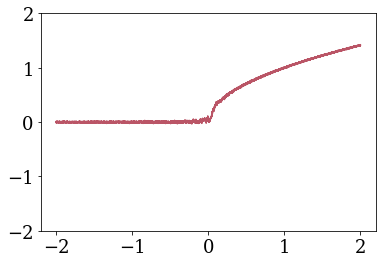

In [10]:
plt.plot(l,result[:,0],color=c2,zorder=9)
plt.ylim([-2,2])

<lambdifygenerated-6>:2: RuntimeWarning: invalid value encountered in sqrt
  return lambda_ + (3/2)*sqrt(4*lambda_ + 1) + 3/2


-21.304985638585592

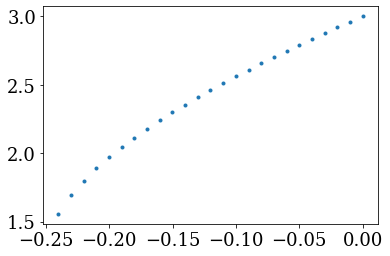

In [11]:
bif_idx=np.abs(0-l).argmin()
slow_idx=np.abs(adiab3-l).argmin()

fast_window=bif_idx-slow_idx
fast_window
adiab3

M_fun= lambdify([ls],Mr)
lvars=np.linspace(-10,0,1000)
plt.plot(lvars,M_fun(lvars),'.')

t_adiab0=-1/np.real(M1(complex(adiab2)))
t_adiab0/dt

t_adiab=-1/np.real(M_fun(complex(adiab3)))
t_adiab/dt

In [12]:
M_fun(complex(adiab3))

(3.0039916987359616+0j)

C:\Users\gomel\AppData\Local\Temp\ipykernel_33148\687771868.py:6: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(l[l<0],-np.sqrt(l[l<0]),'-k',alpha=1)


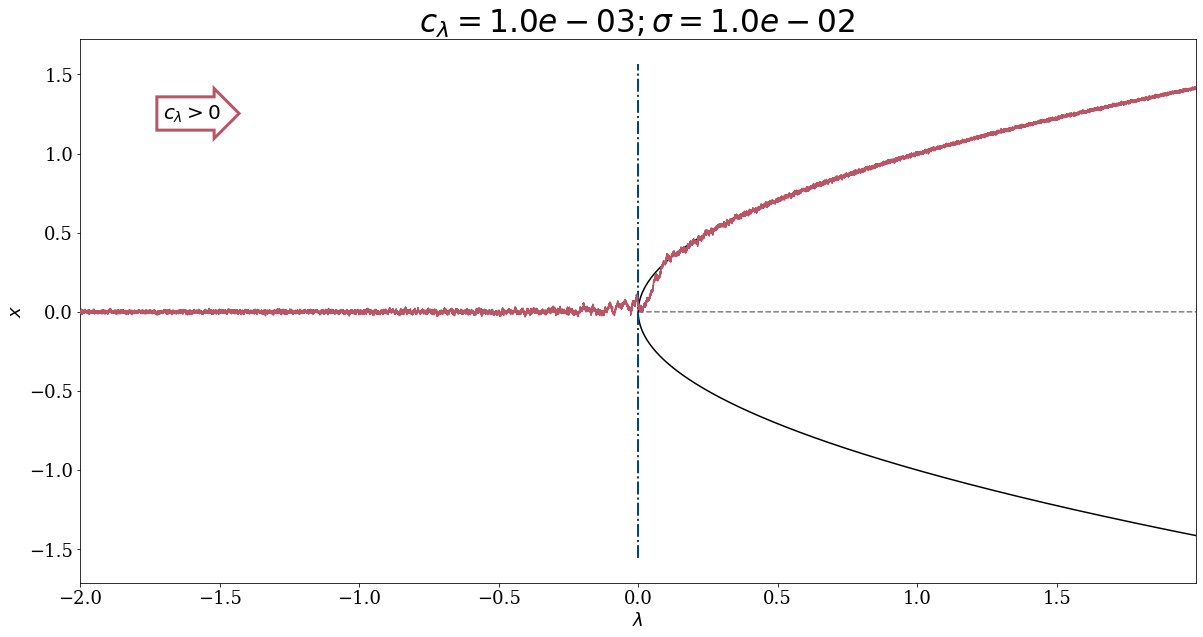

In [13]:

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111)
plt.plot(l,result[:,0],color=c2,zorder=9)
plt.plot(l[l>0],np.sqrt(l[l>0]),'-k',alpha=1)
plt.plot(l[l>0],-np.sqrt(l[l>0]),'-k',alpha=1)
plt.plot(l[l<0],-np.sqrt(l[l<0]),'-k',alpha=1)

plt.plot(l[l>0],0*l[l>0],'--k',alpha=0.5)
ylim=ax.get_ylim()
ax.set_xlim(np.min(l),np.max(l))

xlim=ax.get_xlim()
ax.plot([adiab,adiab],ylim,'-.',linewidth=2,color=c1,alpha=1,label='tracking')

ax.plot([adiab3,adiab3],ylim,'-.',linewidth=2,color=c3,alpha=1,label='tracking')
#lt.plot(result[result[:,1]>0,1],result[result[:,1]>0,0],'r')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$x$')
plt.rc('font',size=26)


if np.sign(cl)<0:
    t = ax.text(
        xlim[1]*0.8, 0.8*ylim[1], "$c_\lambda<0$", ha="center", va="center", rotation=0, size=20,
        bbox=dict(boxstyle="larrow,pad=0.3",fc="white", ec=c2, lw=3))
else:
    t = ax.text(
    xlim[0]*0.8, 0.8*ylim[1], "$c_\lambda>0$", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="rarrow,pad=0.3",fc="white", ec=c2, lw=3))
ax.set_title(r'$c_\lambda=%.1e ; \sigma=%.1e $ '%(cl,s))
fig.savefig('./bifurcation_additive.png'  , dpi = 130, bbox_inches='tight')# when saving, specify the DPI



#### Integration scheme: 

Here I use the sdeint python package to integrate based on the Heun scheme. This decision is based on the paper "Integration of stochastic differential equations on a computer" from R.Manella.
DOI: 10.1142/S0129183102004042


Here i do a set of 'n' runs to do statististics on: 

## Detrended

In [ ]:
from scipy import signal

bootstrapping=False
smoothing=True


bif_idx=np.abs(0.-l).argmin()
adiab_idx=np.abs(adiab-l).argmin()
adiab2_idx=np.abs(adiab2-l).argmin()
adiab3_idx=np.abs(adiab3-l).argmin()

trans=bif_idx
res=result[:,0]
dlen=len(res)
t=np.arange(0,len(res),1)
ind_f=t


varwin=np.int64(15*t_win/dt+1)
ewswin=np.int64(2*np.int64(t_adiab/dt)+1)
ts = ews.TimeSeries(data=res)  ### ews stats ### 

bw=varwin/2
if smoothing==True:
    ts.detrend(method='Gaussian',bandwidth=bw, span=varwin)
    smooth=ts.state['smoothing'].values
    residuals=ts.state['residuals'].values
    data=residuals

    fig=plt.figure(figsize=(20,10))

    ax=fig.add_subplot(111)
    plt.plot(t,res,'-',color='black',lw=3)
    plt.plot(t,smooth,color=c1,lw=2)
    plt.xlim(t[0],t[-1])
    sa.plot_detrend(fig, ewswin,varwin,t_rm,dt,bw,trans)

ax.set_title(r'$c_\lambda=%.1e ; \sigma=%.1e $ '%(cl,s))

ylim=ax.get_ylim()

plt.rc('font',size=26)


ax.plot([adiab_idx,adiab_idx],ylim,':',linewidth=2,color=c1,alpha=1,label='Bifurcation')
ax.plot([adiab2_idx,adiab2_idx],ylim,'-.',linewidth=2,color=c1,alpha=1,label='Bifurcation')
ax.plot([adiab3_idx,adiab3_idx],ylim,'-.',linewidth=2,color=c3,alpha=1,label='Bifurcation')


fig.savefig('./detrend_additive.png'  , dpi = 130, bbox_inches='tight')# when saving, specify the DPI


#add windows and detrending information as an annotation

In [ ]:
t_adiab=-1/np.real(M1(complex(adiab2)))
t_adiab/dt

In [ ]:
tidx,ac_labels,ac1,ac2,var_ews,sk_ews,ku_ews,rtw,hogg2,moors,RTWc= sa.make_stats(tspan,t,ts,varwin,ewswin,sm=smoothing)


if bootstrapping==True:
    dlen=len(ac1)
    mean_b=np.zeros([dlen,2])
    var_b=np.zeros([dlen,2])
    skew_b=np.zeros([dlen,2])
    kur_b=np.zeros([dlen,2])
    kr2_b=np.zeros([dlen,2])
    kr3_b=np.zeros([dlen,2])
    RTW_b=np.zeros([dlen,2])
    ac1_std=np.zeros([dlen,2])

In [ ]:
fig=sa.stats_plot(bif_idx,tidx,ind_f,s,rtw,RTWc,moors,hogg2,ac1,ku_ews,sk_ews,ac2,var_ews,residuals,res,smooth,smoothing,ewswin,datalen)
fig.savefig('./Gdet_additive.png'  , dpi = 130, bbox_inches='tight')# when saving, specify the DPI
fig=sa.ac12_plot(ac1,ac2,tidx,bif_idx)

## Non detrended data:

In [ ]:

bootstrapping=False
smoothing=False

ts = ews.TimeSeries(data=res)  ### ews stats ### 
tidx,ac_labels,ac1,ac2,var_ews,sk_ews,ku_ews,rtw,hogg2,moors,RTWc= sa.make_stats(tspan,t,ts,varwin,ewswin)

if bootstrapping==True:
    dlen=len(ac1)
    mean_b=np.zeros([dlen,2])
    var_b=np.zeros([dlen,2])
    skew_b=np.zeros([dlen,2])
    kur_b=np.zeros([dlen,2])
    kr2_b=np.zeros([dlen,2])
    kr3_b=np.zeros([dlen,2])
    RTW_b=np.zeros([dlen,2])
    ac1_std=np.zeros([dlen,2])

fig=sa.stats_plot(bif_idx,tidx,ind_f,s,rtw,RTWc,moors,hogg2,ac1,ku_ews,sk_ews,ac2,var_ews,residuals,res,smooth,smoothing,ewswin,datalen)
fig.savefig('./No_det_additive.png'  , dpi = 130, bbox_inches='tight')# when saving, specify the DPI
fig=sa.ac12_plot(ac1,ac2,tidx,bif_idx)

To do: 

- implement WOTAN package detrending
- fix bootstraping

 vr_b = bts.boot_result(bts.blockbootstrap(np.var,res,n_resample_case,rep=True,sd=1,perc=sample_perc)[0])
    var[j]= vr_b[0]
    var_b[j]=vr_b[1][0],vr_b[1][1]
    sk_b = bts.boot_result(bts.blockbootstrap(st.skew,res,n_resample_case,rep=True,sd=1,perc=sample_perc)[0])
    skew[j]= sk_b[0]
    skew_b[j]=sk_b[1][0],sk_b[1][1]
    sk_b = bts.boot_result(bts.blockbootstrap(np.mean,res,n_resample_case,rep=True,sd=1,perc=sample_perc)[0])
    mean[j]= sk_b[0]
    mean_b[j]=sk_b[1][0],sk_b[1][1]
    sk_b = bts.boot_result(bts.blockbootstrap(st.kurtosis,res,n_resample_case,rep=True,sd=1,perc=sample_perc)[0])
    kur[j]= sk_b[0]
    kur_b[j]=sk_b[1][0],sk_b[1][1]
    sk_b = bts.boot_result(bts.blockbootstrap(metrics.RTW_max,res,n_resample_case,rep=True,sd=1,perc=sample_perc)[0])
    RTW[j]= sk_b[0]
    RTW_b[j]=sk_b[1][0],sk_b[1][1]
    try:
        sk_b = bts.boot_result(bts.blockbootstrap(metrics.kr2,res,n_resample_case,rep=True,sd=1,perc=sample_perc)[0])
        kr2[j]= sk_b[0]
        kr2_b[j]= sk_b[1][0],sk_b[1][1]
        sk_b = bts.boot_result(bts.blockbootstrap(metrics.kr3,res,n_resample_case,rep=True,sd=1,perc=sample_perc)[0])
        kr3[j]= sk_b[0]
        kr3_b[j]= sk_b[1][0],sk_b[1][1]
    except:
        continue

In [ ]:
def G(x, t):
    #B=[ 'noise in x'         0    ]
    #  [      0        'noise in r']
    B = np.diag([s*x[0]]) # diagonal, so independent driving Wiener processes
    #the only parameter with relevant aditive noise is X(t) in this case. 
    return B
np.random.seed(1) #set numpy.random seed for reproducibility whenever it might be used.
l_var=np.linspace(lf,l0,20)
l=l0+cl*tspan
dl=cl*tspan[1]-l0


result2 = sdeint.stratHeun(f, G, x0, tspan)
print('Integration DOOONNEE')

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(l,result2[:,0],color=c2,zorder=10)
plt.plot(l[l>-0.25],np.sqrt(1/2)*np.sqrt(1+np.sqrt(1+4*l[l>-0.25])),'-',color='black')
plt.plot(l[l<0],0*l[l<0],'-k')
plt.plot(l[l>0],0*l[l>0],'--k',alpha=0.5)
plt.plot(l[(l<0) & (l>-0.25)],m_inest_1(l),'--k',alpha=0.5)

#lt.plot(result[result[:,1]>0,1],result[result[:,1]>0,0],'r')
plt.xlabel(r'$\lambda$')
plt.ylabel('$x$')
plt.subplot(212)
plt.plot(tspan,l,color=c1,lw=2)
plt.xlabel('t')
plt.ylabel(r'$\lambda$')
#print('$\dot{r}$: ',dot_r,(result[2,1]-result[1,1])/(tspan[2]-tspan[1]) )
print('$dt$: ',tspan[2]-tspan[1])


In [ ]:
from scipy import signal

bootstrapping=False
smoothing=True

bif_idx=np.abs(0.-l).argmin()

trans=bif_idx
res=result2[:,0]
dlen=len(res)
t=np.arange(0,len(res),1)
ind_f=t
adiab_idx=np.abs(adiab-l).argmin()
adiab2_idx=np.abs(adiab2-l).argmin()


ts = ews.TimeSeries(data=res)  ### ews stats ### 

if smoothing==True:
    ts.detrend(method='Gaussian',bandwidth=bw, span=varwin)
    smooth=ts.state['smoothing'].values
    residuals=ts.state['residuals'].values
    data=residuals

    fig=plt.figure(figsize=(10,5))
    ax=fig.add_subplot(111)
    plt.plot(t,res,'-',color='black',lw=3)
    plt.plot(t,smooth,color=c1,lw=2)
    
    sa.plot_detrend(fig, ewswin,varwin,t_rm,dt,bw,trans)
ylim=ax.get_ylim()
ax.plot([adiab_idx,adiab_idx],ylim,':',linewidth=2,color=c1,alpha=1,label='Bifurcation',zorder=0)
ax.plot([adiab2_idx,adiab2_idx],ylim,'-.',linewidth=2,color=c1,alpha=1,label='Bifurcation',zorder=0)


In [ ]:
tidx,ac_labels,ac1,ac2,var_ews,sk_ews,ku_ews,rtw,hogg2,moors,RTWc= sa.make_stats(tspan,t,ts,varwin,ewswin,sm=smoothing)

if bootstrapping==True:
    dlen=len(ac1)
    mean_b=np.zeros([dlen,2])
    var_b=np.zeros([dlen,2])
    skew_b=np.zeros([dlen,2])
    kur_b=np.zeros([dlen,2])
    kr2_b=np.zeros([dlen,2])
    kr3_b=np.zeros([dlen,2])
    RTW_b=np.zeros([dlen,2])
    ac1_std=np.zeros([dlen,2])


In [ ]:

fig=sa.stats_plot(bif_idx,tidx,ind_f,s,rtw,RTWc,moors,hogg2,ac1,ku_ews,sk_ews,ac2,var_ews,residuals,res,smooth,smoothing,ewswin,datalen)
fig.savefig('./Gdet_multiplicative.png'  , dpi = 130, bbox_inches='tight')# when saving, specify the DPI
fig=sa.ac12_plot(ac1,ac2,tidx,bif_idx)

## not detrended data

In [ ]:

bootstrapping=False
smoothing=False

ts = ews.TimeSeries(data=res)  ### ews stats ### 
data=res

if smoothing==True:
    ts.detrend(method='Gaussian',bandwidth=0.01, span=varwin)
    smooth=ts.state['smoothing'].values
    residuals=ts.state['residuals'].values
    data=residuals
    fig=plt.figure(figsize=(10,5))
    plt.plot(t,res)
    plt.plot(t,smooth)
    
    
tidx,ac_labels,ac1,ac2,var_ews,sk_ews,ku_ews,rtw,hogg2,moors,RTWc= sa.make_stats(tspan,t,ts,varwin,ewswin)

fig=sa.stats_plot(bif_idx,tidx,ind_f,s,rtw,RTWc,moors,hogg2,ac1,ku_ews,sk_ews,ac2,var_ews,residuals,res,smooth,smoothing,ewswin,datalen)
fig.savefig('./No_det_multiplicative.png'  , dpi = 130, bbox_inches='tight')# when saving, specify the DPI


In [ ]:
#cambiar kr2 por moors, pasar s como argument, o s*x

In [ ]:

fig=sa.ac12_plot(ac1,ac2,tidx,bif_idx)

In [ ]:


hogg2_b=np.zeros([len(tidx),2])
hogg2b=np.zeros([len(tidx)])
n_resample_case=500 #Bootstraping re-samples
sample_perc=70 #Bootstraping percentile
sk_b = [bts.boot_result(bts.blockbootstrap(metrics.Hogg2,data[j:tidx[j]],n_resample_case,rep=True,sd=1,perc=sample_perc)[0]) for j  in  range(len(tidx))]




In [ ]:
tb=tidx[::np.int64(len(tidx)/2000)]

In [ ]:
len(tb)

In [ ]:
hogg2_b=np.zeros([len(tb),2])
hogg2b=np.zeros([len(tb)])
n_resample_case=10 #Bootstraping re-samples
sample_perc=70 #Bootstraping percentile
sk_b = [bts.boot_result(bts.blockbootstrap(metrics.Hogg2,data[j:tb[j]],n_resample_case,rep=True,sd=1,perc=sample_perc)[0]) for j  in  range(len(tb))]


hogg2_b=np.zeros([len(tb),2])
hogg2_b[:,0]=[sk_b[j][1][0] for j  in  range(len(tb))]
hogg2_b[:,1]=[sk_b[j][1][1] for j  in  range(len(tb))]



In [ ]:
fig=plt.figure(figsize=(20,20))
plt.plot(tidx,hogg2,'b',alpha=0.6)
plt.plot(tb,hogg2b,'b')
plt.fill_between(tb, hogg2_b[:,0], hogg2_b[:,1], color=CB_color_cycle[0], alpha=.4)

plt.plot([bif_idx,bif_idx],ylim,'-',linewidth=4,color='gray',alpha=0.3)


In [ ]:
mr_b=np.zeros([len(tb),2])
mrb=np.zeros([len(tb)])
n_resample_case=10 #Bootstraping re-samples
sample_perc=70 #Bootstraping percentile
sk_b = [bts.boot_result(bts.blockbootstrap(metrics.Moors,data[j:tb[j]],n_resample_case,rep=True,sd=1,perc=sample_perc)[0]) for j  in  range(len(tb))]


mrb=[sk_b[j][0] for j  in  range(len(tb))]
mr_b[:,0]=[sk_b[j][1][0] for j  in  range(len(tb))]
mr_b[:,1]=[sk_b[j][1][1] for j  in  range(len(tb))]



In [ ]:
mrb=[sk_b[j][0] for j  in  range(len(tb))]
mr_b[:,0]=[sk_b[j][1][0] for j  in  range(len(tb))]
mr_b[:,1]=[sk_b[j][1][1] for j  in  range(len(tb))]

fig=plt.figure(figsize=(20,20))
plt.plot(tidx,moors,'b',alpha=0.6)
plt.plot(tb,mrb,'b')
plt.fill_between(tb, mr_b[:,0], mr_b[:,1], color=CB_color_cycle[0], alpha=.4)

plt.plot([bif_idx,bif_idx],ylim,'-',linewidth=4,color='gray',alpha=0.3)
plt.ylim([-1,3])

In [ ]:
ewswin

In [ ]:
len(res)/2000

In [ ]:
fig=plt.figure(figsize=(20,9))
plt.plot(r1,var1,'b',linewidth=3)
plt.plot(r2,var2,'r',linewidth=2)
plt.plot(r1[r1>-0.25],m_sol1(r1),'-',color='k')
plt.plot(r1[(r1<0) & (r1>-0.25)],m_inest(r1),'--',color='k')
plt.plot(r1[r1<0],0*r1[r1<0],'-',color='k')
plt.plot(r1[r1>-0.25],-m_sol1(r1),'-',color='k')
plt.plot(r1[(r1<0) & (r1>-0.25)],-m_inest(r1),'--',color='k')
plt.xlabel('r',fontsize=16)
plt.ylabel('x',fontsize=16)
plt.xlim([-1,1])
right_inset_ax = fig.add_axes([.16, .2, .4, 9/20*0.4])
right_inset_ax.plot(r1,var1,'b',linewidth=3)
right_inset_ax.plot(r2,var2,'r',linewidth=2)
right_inset_ax.plot(r1[r1>-0.25],m_sol1(r1),'-',color='k')
right_inset_ax.plot(r1[(r1<0) & (r1>-0.25)],m_inest(r1),'--',color='k')
right_inset_ax.plot(r1[r1<0],0*r1[r1<0],'-',color='k')
right_inset_ax.plot(r1[r1>-0.25],-m_sol1(r1),'-',color='k')
right_inset_ax.plot(r1[(r1<0) & (r1>-0.25)],-m_inest(r1),'--',color='k')
right_inset_ax.set_xlabel('r')
right_inset_ax.set_ylabel('x')
right_inset_ax.set_xlim([-3,3])
#right_inset_ax.set_xlim([-1,1])
plt.rc('text', usetex=True)
plt.rc('font', family='serif')